In [1]:
## imports
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Load data
filepath = "../eewimmer/flavors_of_cacao.csv"
chocolate = pd.read_csv(filepath)
chocolate.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [3]:
chocolate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [4]:
####DATA CLEANING

In [5]:
#Rename column headers

In [6]:
chocolate.columns = [
    'company_maker',
    'specific_bean_origin_or_bar_name',
    'ref',
    'review_date',
    'cocoa_percent',
    'company_location',
    'rating',
    'bean_type',
    'broad_bean_origin'
]
print(chocolate.columns)

Index(['company_maker', 'specific_bean_origin_or_bar_name', 'ref',
       'review_date', 'cocoa_percent', 'company_location', 'rating',
       'bean_type', 'broad_bean_origin'],
      dtype='object')


In [7]:
chocolate.head()


,company_maker,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [8]:
choco_drop = chocolate.dropna()
choco_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1793 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   company_maker                     1793 non-null   object 
 1   specific_bean_origin_or_bar_name  1793 non-null   object 
 2   ref                               1793 non-null   int64  
 3   review_date                       1793 non-null   int64  
 4   cocoa_percent                     1793 non-null   object 
 5   company_location                  1793 non-null   object 
 6   rating                            1793 non-null   float64
 7   bean_type                         1793 non-null   object 
 8   broad_bean_origin                 1793 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 140.1+ KB


In [9]:
#see how ¬† reads in
list(chocolate['bean_type'][0:5])

['\xa0', '\xa0', '\xa0', '\xa0', '\xa0']

In [10]:
#replace ¬† with none
def space(x):
    if(x is "\xa0"):
        return "None"
    
chocolate['bean_type'] = chocolate['bean_type'].apply(space)
chocolate.head()

<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/bw/f8rp5syd2lq98wb4b23814vm0000gn/T/ipykernel_1913/3912743429.py:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if(x is "\xa0"):


,company_maker,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,None,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,None,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,None,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,None,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,None,Peru


In [28]:
#data to view the number of manufacturing companies per country
chocolate['company_location'].value_counts()

company_location
U.S.A.               764
France               156
Canada               125
U.K.                  96
Italy                 63
Ecuador               54
Australia             49
Belgium               40
Switzerland           38
Germany               35
Austria               26
Spain                 25
Colombia              23
Hungary               22
Venezuela             20
Japan                 17
Brazil                17
Peru                  17
Madagascar            17
New Zealand           17
Denmark               15
Vietnam               11
Scotland              10
Guatemala             10
Israel                 9
Costa Rica             9
Argentina              9
Poland                 8
Lithuania              6
Honduras               6
South Korea            5
Nicaragua              5
Sweden                 5
Domincan Republic      5
Ireland                4
Netherlands            4
Fiji                   4
Sao Tome               4
Puerto Rico            4
Mexico  

In [31]:
#thats too many countries. look at the top 10 and create new df
top_countries = chocolate['company_location'].value_counts().head(10).reset_index()
top_countries.columns = ['company_location', 'count']
top_countries.head()

,company_location,count
0,U.S.A.,764
1,France,156
2,Canada,125
3,U.K.,96
4,Italy,63


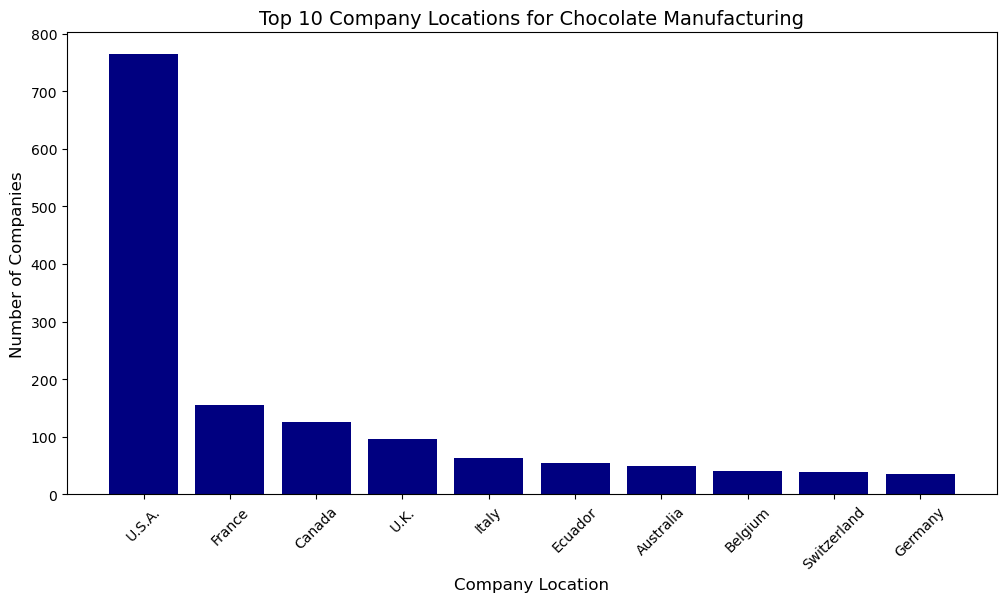

In [35]:
#bar chart
plt.figure(figsize=(12, 6))

plt.bar(top_countries['company_location'], top_countries['count'], color='navy')
plt.title('Top 10 Company Locations for Chocolate Manufacturing', fontsize=14)
plt.xlabel('Company Location', fontsize=12)
plt.ylabel('Number of Companies', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [45]:
#number of rewviews per year
reviews = chocolate['review_date'].value_counts()
print(reviews)

review_date
2015    285
2014    247
2016    219
2012    195
2013    184
2011    165
2009    123
2010    111
2008     93
2007     77
2006     72
2017     24
Name: count, dtype: int64


In [52]:
#make that into a dateframe with counts
reviews = chocolate['review_date'].value_counts().reset_index()
reviews.columns = ['review_date', 'count']
reviews.head()

,review_date,count
0,2015,285
1,2014,247
2,2016,219
3,2012,195
4,2013,184


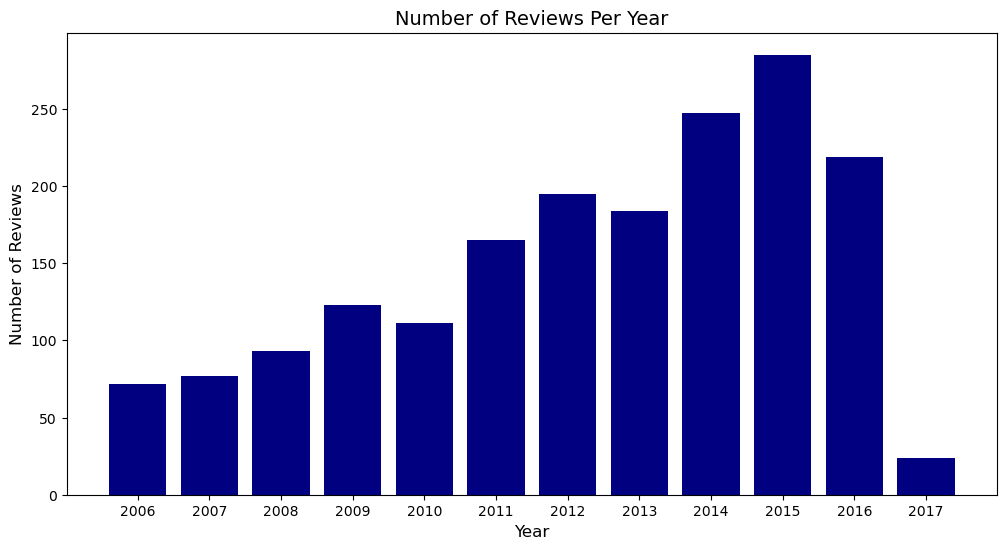

In [65]:
#bar chart to show how many reveiws per year
plt.figure(figsize=(12, 6))
plt.bar(reviews['review_date'], reviews['count'], color='navy')
plt.title('Number of Reviews Per Year', fontsize=14)
plt.xticks(reviews['review_date'])
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.show()

![](https://sc01.alicdn.com/kf/UT8Y1g1XKRXXXagOFbXU/cocoa-beans.jpg_350x350.jpg)
## Chocolate Bar Ratings
Chocolate is one of the most popular candies in the world. Each year, residents of the United States collectively eat more than 2.8 billions pounds. However, not all chocolate bars are created equal! This dataset contains expert ratings of over 1,700 individual chocolate bars, along with information on their regional origin, percentage of cocoa, the variety of chocolate bean used and where the beans were grown.

### Flavors of Cacao Rating System:
- 5= Elite (Transcending beyond the ordinary limits)
- 4= Premium (Superior flavor development, character and style)
- 3= Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)
- 2= Disappointing (Passable but contains at least one significant flaw)
- 1= Unpleasant (mostly unpalatable)

### Data description
- __Company  (Maker-if known)__ - Name of the company manufacturing the bar.
- __Specific Bean Origin or Bar Name__ - The specific geo-region of origin for the bar.
- __REF__ - <font color='red'>Help us describe this column...</font> __What is it?__
- __Review Date__ - Date of publication of the review.
- __Cocoa Percent__ - Cocoa percentage (darkness) of the chocolate bar being reviewed.
- __Company Location__ - Manufacturer base country.
- __Rating __- Expert rating for the bar.
- __Bean Type__ - The variety (breed) of bean used, if provided.
- __Broad Bean Origin__ - The broad geo-region of origin for the bean.

### Table of content
1. [Data preparation + EDA](#eda)
2. [Feature engineering](#fe)
3. [Data visualization](#dv)
4. [WHAT IS REF?!](#ref)

## Author's summary
Hello everyone! This is my very first kernel in Kaggle platform. I hope that you will enjoy my work.  Thx.

<a id="eda">
#### 1. Data preparation + EDA

In [ ]:
print(os.getcwd())

In [27]:
## Load data
filepath = "../eewimmer/flavors_of_cacao.csv"
choko = pd.read_csv(filepath)
choko.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [28]:
# Explore description
choko.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company \n(Maker-if known),1795,416,Soma,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Specific Bean Origin\nor Bar Name,1795,1039,Madagascar,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REF,1795.0,NaN,NaN,NaN,1035.904735,552.886365,5.0,576.0,1069.0,1502.0,1952.0
Review\nDate,1795.0,NaN,NaN,NaN,2012.325348,2.92721,2006.0,2010.0,2013.0,2015.0,2017.0
Cocoa\nPercent,1795,45,70%,672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Company\nLocation,1795,60,U.S.A.,764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,1795.0,NaN,NaN,NaN,3.185933,0.478062,1.0,2.875,3.25,3.5,5.0
Bean\nType,1794,41,,887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Broad Bean\nOrigin,1794,100,Venezuela,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Explore datatypes
choko.dtypes

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

In [30]:
## Before we continue - rename some columns, 
original_colnames = choko.columns
new_colnames = ['company', 'species', 'REF', 'review_year', 'cocoa_p',
                'company_location', 'rating', 'bean_typ', 'country']
choko = choko.rename(columns=dict(zip(original_colnames, new_colnames)))
## And modify data types
choko['cocoa_p'] = choko['cocoa_p'].str.replace('%','').astype(float)/100
choko.head()

,company,species,REF,review_year,cocoa_p,company_location,rating,bean_typ,country
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru


In [31]:
# Explore description
choko.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
company,1795,416,Soma,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
species,1795,1039,Madagascar,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REF,1795.0,NaN,NaN,NaN,1035.904735,552.886365,5.0,576.0,1069.0,1502.0,1952.0
review_year,1795.0,NaN,NaN,NaN,2012.325348,2.92721,2006.0,2010.0,2013.0,2015.0,2017.0
cocoa_p,1795.0,NaN,NaN,NaN,0.716983,0.063231,0.42,0.7,0.7,0.75,1.0
company_location,1795,60,U.S.A.,764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1795.0,NaN,NaN,NaN,3.185933,0.478062,1.0,2.875,3.25,3.5,5.0
bean_typ,1794,41,,887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,1794,100,Venezuela,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
## Look at most frequent species
choko['species'].value_counts().head(10)

species
Madagascar            57
Peru                  45
Ecuador               42
Dominican Republic    37
Venezuela             21
Chuao                 19
Sambirano             19
Ocumare               17
Ghana                 15
Papua New Guinea      15
Name: count, dtype: int64

In [33]:
## Is where any N/A values in origin country?
choko['country'].isnull().value_counts()

country
False    1794
True        1
Name: count, dtype: int64

In [34]:
## Replace origin country
choko['country'] = choko['country'].fillna(choko['species'])
choko['country'].isnull().value_counts()


country
False    1795
Name: count, dtype: int64

In [35]:
## Look at most frequent origin countries
choko['country'].value_counts().head(10)

country
Venezuela             214
Ecuador               193
Peru                  165
Madagascar            146
Dominican Republic    141
                       73
Nicaragua              60
Brazil                 58
Bolivia                57
Belize                 49
Name: count, dtype: int64

In [36]:
## Wee see that a lot of countries have ' ' value - means that this is 100% blend. Let's look at this
choko[choko['country'].str.len()==1]['species'].unique()

array(['Nine', 'Toscano Black', 'Houseblend', 'Nature', 'Organic Dark',
       'One Hundred', 'Blend', 'Lago di Como, Blu', 'Blend No. 1',
       'Philly Blend, 5 plantations', 'Kendari', 'Tarakan', 'Maragda',
       'Sensations Intense', 'Zorzal Reserva, 2015 H., Kerchner', 'Noir',
       'Ilblend', 'Red Vanilla', 'Supremo- SF', 'Dark',
       'Epique, Blend No. 49', 'Coucher du Soleil', 'Lever du Soleil',
       'Onyx', 'Nocturne', 'Complexite', 'Special Maker Reserve',
       'Quetzalcoatl', 'Tsaranta', 'Semisweet', 'Campesino w/ nibs',
       'Trinitario', 'Downtown London', 'Africa meets Latina', 'Amazonas',
       'one hundred', 'Kuruba', 'Orinoco', 'Excellence (US Version)',
       'Cacao Nib Crunch', 'Brooklyn Blend', 'Carre Amer',
       'Carre Grand Noir', 'Noir Infini',
       'Grand Cru Blend No.1, 5 yr. Anniversary Ed', 'Signature Blend',
       'Raw', 'Mid Mountain, 2014', '100 percent', 'Latino', 'Nibby',
       'Extra Dark', 'Bittersweet', 'Wasatch', "Chef's Blend",
   

In [37]:
## Is there another way to determine blends?
choko[choko['species'].str.contains(',')]['species'].nunique()

533

In [38]:
## Is there any misspelling/reduction?
choko['country'].sort_values().unique()

array(['Africa, Carribean, C. Am.', 'Australia', 'Belize', 'Bolivia',
       'Brazil', 'Burma', 'Cameroon', 'Carribean',
       'Carribean(DR/Jam/Tri)', 'Central and S. America', 'Colombia',
       'Colombia, Ecuador', 'Congo', 'Cost Rica, Ven', 'Costa Rica',
       'Cuba', 'DR, Ecuador, Peru', 'Dom. Rep., Madagascar',
       'Domincan Republic', 'Dominican Rep., Bali', 'Dominican Republic',
       'Ecuador', 'Ecuador, Costa Rica', 'Ecuador, Mad., PNG',
       'El Salvador', 'Fiji', 'Gabon', 'Ghana', 'Ghana & Madagascar',
       'Ghana, Domin. Rep', 'Ghana, Panama, Ecuador',
       'Gre., PNG, Haw., Haiti, Mad', 'Grenada',
       'Guat., D.R., Peru, Mad., PNG', 'Guatemala', 'Haiti', 'Hawaii',
       'Honduras', 'India', 'Indonesia', 'Indonesia, Ghana',
       'Ivory Coast', 'Jamaica', 'Liberia', 'Mad., Java, PNG',
       'Madagascar', 'Madagascar & Ecuador', 'Malaysia', 'Martinique',
       'Mexico', 'Nicaragua', 'Nigeria', 'PNG, Vanuatu, Mad', 'Panama',
       'Papua New Guinea', 'Per

In [ ]:
## Text preparation (correction) func
def txt_prep(text):
    replacements = [
        ['-', ', '], ['/ ', ', '], ['/', ', '], ['\(', ', '], [' and', ', '], [' &', ', '], ['\)', ''],
        ['Dom Rep|DR|Domin Rep|Dominican Rep,|Domincan Republic', 'Dominican Republic'],
        ['Mad,|Mad$', 'Madagascar, '],
        ['PNG', 'Papua New Guinea, '],
        ['Guat,|Guat$', 'Guatemala, '],
        ['Ven,|Ven$|Venez,|Venez$', 'Venezuela, '],
        ['Ecu,|Ecu$|Ecuad,|Ecuad$', 'Ecuador, '],
        ['Nic,|Nic$', 'Nicaragua, '],
        ['Cost Rica', 'Costa Rica'],
        ['Mex,|Mex$', 'Mexico, '],
        ['Jam,|Jam$', 'Jamaica, '],
        ['Haw,|Haw$', 'Hawaii, '],
        ['Gre,|Gre$', 'Grenada, '],
        ['Tri,|Tri$', 'Trinidad, '],
        ['C Am', 'Central America'],
        ['S America', 'South America'],
        [', $', ''], [',  ', ', '], [', ,', ', '], ['\xa0', ' '],[',\s+', ','],
        [' Bali', ',Bali']
    ]
    for i, j in replacements:
        text = re.sub(i, j, text)
    return text

In [ ]:
choko['country'].str.replace('.', '').apply(txt_prep).unique()

In [ ]:
## Replace country feature
choko['country'] = choko['country'].str.replace('.', '').apply(txt_prep)

In [ ]:
## Looks better
choko['country'].value_counts().tail(10)

In [ ]:
## How many countries may contain in Blend?
(choko['country'].str.count(',')+1).value_counts()

In [ ]:
## Is there any misspelling/reduction in company location?
choko['company_location'].sort_values().unique()

In [ ]:
## We need to make some replacements
choko['company_location'] = choko['company_location']\
.str.replace('Amsterdam', 'Holland')\
.str.replace('U.K.', 'England')\
.str.replace('Niacragua', 'Nicaragua')\
.str.replace('Domincan Republic', 'Dominican Republic')

choko['company_location'].sort_values().unique()

In [ ]:
## Is there any misspelling/reduction in company name?
choko['company'].str.lower().sort_values().nunique() == choko['company'].sort_values().nunique()

<a id="fe">
#### 2. Feature engineering

In [ ]:
## Let's define blend feature
choko['is_blend'] = np.where(
    np.logical_or(
        np.logical_or(choko['species'].str.lower().str.contains(',|(blend)|;'),
                      choko['country'].str.len() == 1),
        choko['country'].str.lower().str.contains(',')
    )
    , 1
    , 0
)
## How many blends/pure cocoa?
choko['is_blend'].value_counts()

In [ ]:
## Look at 5 blends/pure rows
choko.groupby('is_blend').head(5)

In [ ]:
## Define domestic feature
choko['is_domestic'] = np.where(choko['country'] == choko['company_location'], 1, 0)
choko['is_domestic'].value_counts()

<a id="dv">
#### 3. Data Visualization

In [ ]:
## Look at distribution of Cocoa %
fig, ax = plt.subplots(figsize=[16,4])
sns.distplot(choko['cocoa_p'], ax=ax)
ax.set_title('Cocoa %, Distribution')
plt.show()

In [ ]:
## Look at distribution of rating
fig, ax = plt.subplots(figsize=[16,4])
for i, c in choko.groupby('is_domestic'):
    sns.distplot(c['cocoa_p'], ax=ax, label=['Not Domestic', 'Domestic'][i])
ax.set_title('Cocoa %, Distribution, hue=Domestic')
ax.legend()
plt.show()

In [ ]:
## Look at distribution of rating
fig, ax = plt.subplots(figsize=[16,4])
sns.distplot(choko['rating'], ax=ax)
ax.set_title('Rating, Distribution')
plt.show()

In [ ]:
## Look at distribution of rating
fig, ax = plt.subplots(figsize=[16,4])
for i, c in choko.groupby('is_domestic'):
    sns.distplot(c['rating'], ax=ax, label=['Not Domestic', 'Domestic'][i])
ax.set_title('Rating, Distribution, hue=Domestic')
ax.legend()
plt.show()

In [ ]:
## Look at boxplot over the countries, even Blends
fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=choko,
    y='country',
    x='rating'
)
ax.set_title('Boxplot, Rating for countries (+blends)')

In [ ]:
## But hot we can see what country is biggest contributor in rating?
choko_ = pd.concat([pd.Series(row['rating'], row['country'].split(',')) for _, row in choko.iterrows()]
         ).reset_index()
choko_.columns = ['country', 'rating']
choko_['mean_rating'] = choko_.groupby(['country'])['rating'].transform('mean')

## Look at boxplot over the countries (contributors in blends)
fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=choko_.sort_values('mean_rating', ascending=False),
    y='country',
    x='rating'
)
ax.set_title('Boxplot, Rating for countries (contributors)')

In [ ]:
choko_.groupby(['country'])['rating'].mean().sort_values(ascending=False).head(10)

In [ ]:
choko_ = pd.concat([pd.Series(row['cocoa_p'],
                              row['country'].split(',')) for _, row in choko.iterrows()]
         ).reset_index()
choko_.columns = ['country', 'rating']
choko_['mean_rating'] = choko_.groupby(['country'])['rating'].transform('mean')

In [ ]:
## Look at boxplot over the countries (contributors in blends)
choko_ = pd.concat([pd.Series(row['cocoa_p'], row['country'].split(',')) for _, row in choko.iterrows()]
         ).reset_index()
choko_.columns = ['country', 'cocoa_p']

## Look at boxplot over the countries (contributors in blends)
fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=choko_,
    y='country',
    x='cocoa_p'
)
ax.set_title('Boxplot, Cocoa %, for countries (contributors)')

In [ ]:
## Prepare full tidy choko_ dataframe
def choko_tidy(choko):
    data = []
    for i in choko.itertuples():
        for c in i.country.split(','):
            data.append({
                'company': i.company,
                'species': i.species,
                'REF': i.REF,
                'review_year': i.review_year,
                'cocoa_p': i.cocoa_p,
                'company_location': i.company_location,
                'rating': i.rating,
                'bean_typ': i.bean_typ,
                'country': c,
                'is_blend': i.is_blend,
                'is_domestic': i.is_domestic
            })
    return pd.DataFrame(data)
        
choko_ = choko_tidy(choko)
print(choko_.shape, choko.shape)
choko_.head()

In [ ]:
## Look at rating by company location
fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=choko,
    y='company_location',
    x='rating'
)
ax.set_title('Boxplot, Rating by Company location')

In [ ]:
## What better? Domestic Or not?
fig, ax = plt.subplots(figsize=[6, 6])
sns.boxplot(
    data=choko,
    x='is_domestic',
    y='rating',
)
ax.set_title('Boxplot, Rating by Domestic')

In [ ]:
## What better? Pure or blend?
fig, ax = plt.subplots(figsize=[6, 6])
sns.boxplot(
    data=choko,
    x='is_blend',
    y='rating',
)
ax.set_title('Boxplot, Rating by Blend/Pure')

### Hmmm
- Blend is better
- Domestic is worse 

In [ ]:
choko_.head()

In [ ]:
## Look at goodsflow
flow = pd.crosstab(
    choko_['company_location'],
    choko_['country']
)
flow['tot'] = flow.sum(axis=1)
flow = flow.sort_values('tot', ascending=False)
flow = flow.drop('tot', axis=1)

fig, ax = plt.subplots(figsize=[10,6])
sns.heatmap(flow.head(20), cmap='Reds', linewidths=.5)
ax.set_title('Goods Flow from origin to Company location')

- Biggest manufactorer country - __U.S.A__
- Biggest ofigin coutry is __Equador__, and also biggest domestic manufactorer
- Also a lot of domestics from Colombia, Brazil, Madagascar, Venezuela

In [ ]:
## What about quality(rating)
## Look at goodsflow
flow = pd.crosstab(
    choko_['company_location'],
    choko_['country'],
    choko_['rating'], aggfunc='mean'
)
flow['tot'] = flow.sum(axis=1)
flow = flow.sort_values('tot', ascending=False)
flow = flow.drop('tot', axis=1)

fig, ax = plt.subplots(figsize=[10,6])
sns.heatmap(flow.head(20), cmap='RdBu_r', linewidths=.5)
ax.set_title('Goods Flow from origin to Company location, mean rating')

- __USA__ have the biggest flow of manufactory but mean quality 3-3.5
- In __England__ and __Canada__ very good mean rating

In [ ]:
## What about quality(rating) is case of years
## Look at goodsflow
flow = pd.crosstab(
    choko_['company_location'],
    choko_['review_year'],
    choko_['rating'], aggfunc='mean'
)
flow['tot'] = flow.sum(axis=1)
flow = flow.sort_values('tot', ascending=False)
flow = flow.drop('tot', axis=1)

fig, ax = plt.subplots(figsize=[10,6])
sns.heatmap(flow.head(20), cmap='RdBu_r', linewidths=.5)
ax.set_title('Goods Flow from Company location, mean rating by years')

#### Wow!
- __USA__, __Australia__ mean rating is getting better and better
- __ Canada__ rating is always good

In [ ]:
## Look the same data at the tsplot
flow.T.head()

In [ ]:
flow_ = flow.T
## Preprocess
# for c in flow_.columns:
#     flow_[c] = flow_[c] - flow_[c].dropna().iloc[0]

fig, ax = plt.subplots(figsize=[16,8])
for c in choko_['company_location'].value_counts().head(10).index:
    ax.plot(flow_.index, flow_[c], label=c)
ax.legend(ncol=1, loc=4)
ax.set_title('Timeline of Cocoa Rating by Company location')
plt.show()

In [ ]:
## What country manufacture the best blend|pure?
blends = pd.crosstab(
    choko_['company_location'],
    choko_['is_blend'],
    choko_['rating'], aggfunc='mean'
)
blends['tot'] = blends.max(axis=1)
blends = blends.sort_values('tot', ascending=False)
blends = blends.drop('tot', axis=1)

fig, ax = plt.subplots(figsize=[10,6])
sns.heatmap(blends.head(25), cmap='RdBu_r', linewidths=.5)
ax.set_title('Best Manufactorer from Company location, mean rating blend/pureness')

- __Lithuania, And Bolivia__ blends better than pure
- __Poland, Venezuela and Scotland__ blends are sucks
- __Iceland__ dont produce blends
- __Chile__ the best

In [ ]:
## What country manufacture the best blend|pure?
dom = pd.crosstab(
    choko_['company_location'],
    choko_['is_domestic'],
    choko_['rating'], aggfunc='mean'
)
dom['tot'] = dom.max(axis=1)
dom = dom.sort_values('tot', ascending=False)
dom = dom.drop('tot', axis=1)

fig, ax = plt.subplots(figsize=[10,6])
sns.heatmap(dom.head(25), cmap='RdBu_r', linewidths=.5)
ax.set_title('Best Manufactorer from Company location, mean rating by Domestic or not')

- __Equador, Nicaragua__ better not Domestic.
- Etc

<a id="ref">
### 4. What is REF?!

In [ ]:
## What is REF?
sns.heatmap(choko_.corr(), cmap='coolwarm')

Hmmm.. REF is highli correlated with review_year

In [ ]:
## Look at REF distribution
sns.distplot(choko_['REF'])

In [ ]:
## Look at YEAR distribution
sns.distplot(choko_['review_year'])

In [ ]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=[16,8])
ax1.plot(choko_['review_year'])
ax2.plot(choko_['REF'])
plt.show()

In [ ]:
sns.boxplot(
    data=choko_,
    x='review_year',
    y='REF'
)

In [ ]:
choko_\
.groupby('review_year')\
.agg({'REF': ['min', 'max', 'mean', 'prod', 'nunique', 'count']})

In [ ]:
choko['REF'].nunique(), choko.shape

- REF is highly correlated to review_year
- Sometimes intersects over the year, but never overlaps year cuts
- I think that REF is increment id of  bunch of reviews

Thx,